In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import pylab as pl
import numpy as np  

from sklearn.svm import SVC

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 17})

#### Load the lambda-rho mu-rho data
After Goodway (2009): [The Magic of Lamé, SEG Honorary Lecture](http://seg.org/Education/Lectures/Honorary-Lectures/2009-HL-Goodway).


In [3]:
data = np.loadtxt('LMR5_original.txt', usecols = (0,1,2))

#### Split into features and target, separate blind test data points

In [4]:
X = [[lr, mr] for lr, mr in zip(data[:-7,0], data[:-7,1])]
Y = data[:-7,2]

nextgX = data[-7:-4,0] # test gas points
nextgY = data[-7:-4,1]

nextbX = 22 # test brine point
nextbY = 18

#### Create two models with different C parameter, fit the data

In [5]:
clf = SVC(C=0.1, kernel='linear')
clf.fit(X, Y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
clf1 = SVC(C=1, kernel='linear')
clf1.fit(X, Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Create a mesh to plot the decision regions; each region is assigned a different color

Adapted from a plotting utility in Sebastian Rascka's [Python Machine Learning](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch02/ch02.ipynb).

In [7]:
x_min = 9.; x_max = 41
y_min = 9.; y_max = 41

In [8]:
h = 0.1  # step size in the mesh
xxx, yyy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z  = clf.predict(np.c_[xxx.ravel(), yyy.ravel()])
Z1 = clf1.predict(np.c_[xxx.ravel(), yyy.ravel()])

In [9]:
X1 = [[lr, mr] for lr, mr in zip(data[-3:,0], data[-3:,1])]
Y1 = data[-3:,2]

In [10]:
Z = Z.reshape(xxx.shape)
Z1 = Z1.reshape(xxx.shape)

gasX = [X[i][0] for i in range(0, len(Y)) if Y[i]==1]
gasY = [X[i][1] for i in range(0, len(Y)) if Y[i]==1]
brineX = [X[i][0] for i in range(0, len(Y)) if Y[i]==2]
brineY = [X[i][1] for i in range(0, len(Y)) if Y[i]==2]

In [11]:
colors = ['C1', 'C2']  # R -> G -> B
n_bins = 2  
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

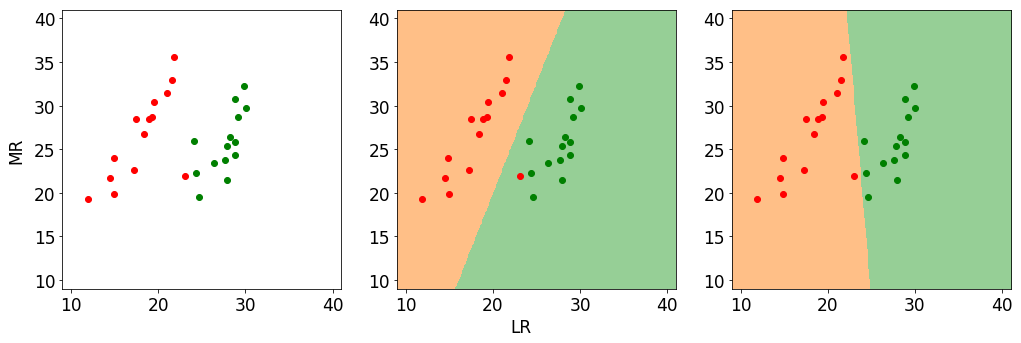

In [12]:
fig, (ax3, ax4, ax5) = plt.subplots(figsize=(17, 6), ncols=3)

ax3.imshow(Z*0, cmap='bone_r', extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower')
ax3.scatter(gasX, gasY, c = 'r')
ax3.scatter(brineX, brineY, c = 'g')

ax4.imshow(Z, cmap=cm, extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower')
ax4.scatter(gasX, gasY, c = 'r')
ax4.scatter(brineX, brineY, c = 'g')

ax5.imshow(Z1, cmap=cm, extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower')
ax5.scatter(gasX, gasY, c = 'r')
ax5.scatter(brineX, brineY, c = 'g')

fig.text(0.5, 0.08, 'LR', ha='center')
fig.text(0.08, 0.5, 'MR', va='center', rotation='vertical')

plt.show()

#### Plot again with the hyperplane and margin

Adapted from [an example](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html) in the Scikit-learn documentation.


In [13]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(9, 41)
yy = a * xx - (clf.intercept_[0]) / w[1]

In [14]:
# get the separating hyperplane
w1 = clf1.coef_[0]
a1 = -w1[0] / w1[1]
xx1 = np.linspace(9, 41)
yy1 = a1 * xx1 - (clf1.intercept_[0]) / w1[1]

In [15]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

In [16]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin1 = 1 / np.sqrt(np.sum(clf1.coef_ ** 2))
yy1_down = yy1 - np.sqrt(1 + a1 ** 2) * margin1
yy1_up = yy1 + np.sqrt(1 + a1 ** 2) * margin1

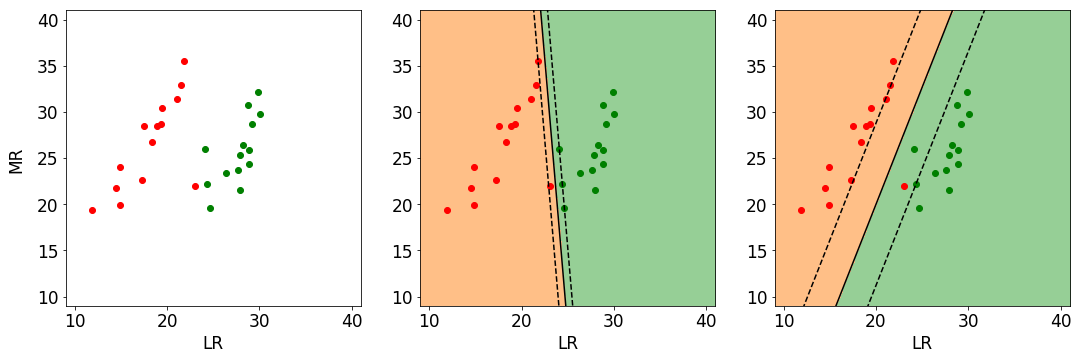

In [17]:
fig, (ax3, ax4, ax5) = plt.subplots(figsize=(18, 6), ncols=3)

ax3.imshow(Z*0, cmap='bone_r', extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower')
ax3.scatter(gasX, gasY, c = 'r')
ax3.scatter(brineX, brineY, c = 'g')
ax3.set_xlabel('LR')

ax4.imshow(Z1, cmap=cm, extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower')
ax4.scatter(gasX, gasY, c = 'r')
ax4.scatter(brineX, brineY, c = 'g')

ax4.plot(xx1, yy1, 'k-')
ax4.plot(xx1, yy1_down, 'k--')
ax4.plot(xx1, yy1_up, 'k--')
ax4.set_xlim(9, 41)
ax4.set_ylim(9, 41)
ax4.set_xlabel('LR')

ax5.imshow(Z, cmap=cm, extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower')
ax5.scatter(gasX, gasY, c = 'r')
ax5.scatter(brineX, brineY, c = 'g')

ax5.plot(xx, yy, 'k-')
ax5.plot(xx, yy_down, 'k--')
ax5.plot(xx, yy_up, 'k--')
ax5.set_xlim(9, 41)
ax5.set_ylim(9, 41)
ax5.set_xlabel('LR')

fig.text(0.08, 0.5, 'MR', va='center', rotation='vertical')

fig.savefig('c_parm.png', dpi=400, bbox_inches='tight', pad_inches=0.4)
plt.show()

#### Plot again with unseen test points

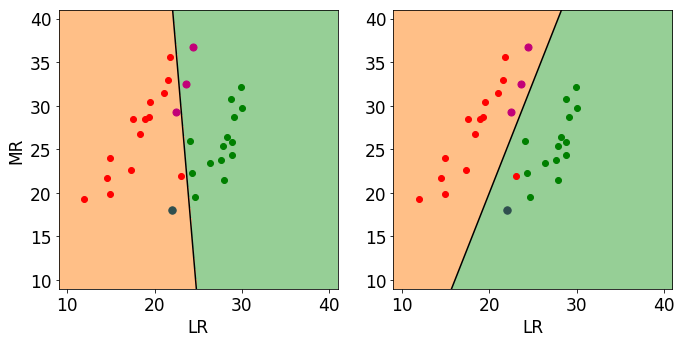

In [18]:
fig,  (ax4, ax5) = plt.subplots(figsize=(11, 6), ncols=2)

ax4.imshow(Z1, cmap=cm, extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower')
ax4.scatter(gasX, gasY, c = 'r')
ax4.scatter(brineX, brineY, c = 'g')
ax4.plot(xx1, yy1, 'k-')
ax4.scatter(nextgX, nextgY, s = 50, facecolors='none', c = 'xkcd:magenta')
ax4.scatter(nextbX, nextbY, s = 55, facecolors='none', c = 'darkslategrey')
ax4.set_xlim(9, 41)
ax4.set_ylim(9, 41)
ax4.set_xlabel('LR')

ax5.imshow(Z, cmap=cm, extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower')
ax5.scatter(gasX, gasY, c = 'r')
ax5.scatter(brineX, brineY, c = 'g')
ax5.plot(xx, yy, 'k-')
ax5.scatter(nextgX, nextgY, s = 50, c = 'xkcd:magenta')
ax5.scatter(nextbX, nextbY, s = 55, c = 'darkslategrey')
ax5.set_xlim(9, 41)
ax5.set_ylim(9, 41)
ax5.set_xlabel('LR')

fig.text(0.06, 0.5, 'MR', va='center', rotation='vertical')

fig.savefig('c_parm_next.png', dpi=400, bbox_inches='tight', pad_inches=0.4)
plt.show()